### Sentiment Analysis on Amazon Customer Reviews Using NLP


### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# text processing libraries
import re
import string
import nltk
from nltk.corpus import stopwords

#sklearn
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

#File system mangement
import os

#suppress warnings
import warnings
warnings.filterwarnings('ignore')


### Reading the Datasets

In [5]:
data = pd.read_csv("C:/Users/ragin/Downloads/amazon_reviews.csv")

In [6]:
data.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


### Basic Exploratory Data Analysis(EDA)

In [8]:
data.shape

(2782, 5)

In [9]:
#missing values 
data.isnull().sum()

asin      0
name      0
date      0
rating    0
review    6
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2776 entries, 0 to 2781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   asin    2776 non-null   object
 1   name    2776 non-null   object
 2   date    2776 non-null   object
 3   rating  2776 non-null   int64 
 4   review  2776 non-null   object
dtypes: int64(1), object(4)
memory usage: 130.1+ KB


### Exploring the Target Column

<Axes: ylabel='count'>

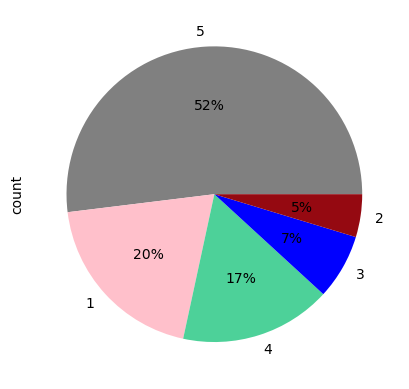

In [14]:
data.rating.value_counts().plot(kind ='pie', autopct = '%1.0f%%', colors = ['grey','pink','#4dd199','blue','#950911'])

<Axes: xlabel='rating', ylabel='count'>

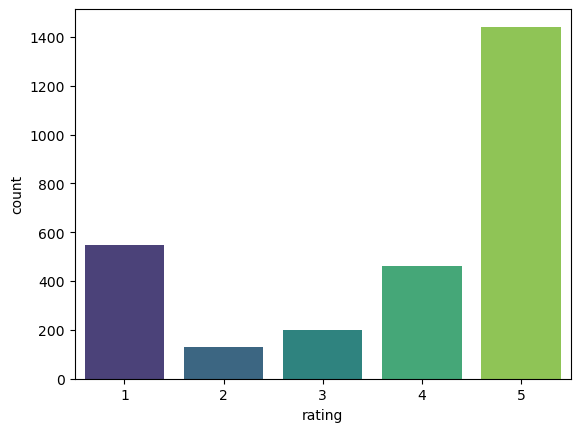

In [15]:
sns.barplot(x = data['rating'].value_counts().index,y = data['rating'].value_counts(),palette = 'viridis')

### Explore the columns

In [17]:
features = "review"
label = "rating"

x = data[features]
y = data[label]

### DIVIDE TRAINING AND TESTING SETS

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
                                                

In [20]:
train_data = pd.DataFrame({features : x_train, label : y_train})
test_data = pd.DataFrame({features : x_test , label : y_test})

In [21]:
print('train data:', train_data.shape)
print('test data:',test_data.shape)

train data: (1943, 2)
test data: (833, 2)


### TFIDF [Term Frequency Inverse Document Frequency] FEATURES 

In [23]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)


### BUILDING A TEXT CLASSIFICATION MODE

## Random Forest Classifier Model

In [26]:
# Initialize RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200)

In [27]:
# Fit the model
text_classifier.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
# Make predictions
y_pred = text_classifier.predict(x_test_tfidf)

In [29]:
# Evaluate model
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9039615846338536


In [30]:
from sklearn.metrics import classification_report

# Print the classification report (precision, recall, F1-score for each class)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.99      0.88      0.93       163
           2       1.00      0.74      0.85        35
           3       0.98      0.77      0.86        66
           4       0.97      0.74      0.84       137
           5       0.85      1.00      0.92       432

    accuracy                           0.90       833
   macro avg       0.96      0.83      0.88       833
weighted avg       0.92      0.90      0.90       833



### Logistic Regression Model

In [32]:
text_classifier_1 = LogisticRegression()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
x_train_tfidf_1 = vectorizer.fit_transform(x_train)
x_test_tfidf_1 = vectorizer.transform(x_test)



In [34]:
text_classifier_1.fit(x_train_tfidf_1, y_train)

LogisticRegression()

In [35]:
y_pred = text_classifier_1.predict(x_test_tfidf_1)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7599039615846338


In [37]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.85      0.82      0.84       163
           2       1.00      0.11      0.21        35
           3       0.94      0.24      0.39        66
           4       0.85      0.37      0.52       137
           5       0.72      0.99      0.83       432

    accuracy                           0.76       833
   macro avg       0.87      0.51      0.56       833
weighted avg       0.80      0.76      0.72       833



### NAVIES BAYES CLASSIFIER
### MultiNomial NB Model

In [39]:
vectorizer = TfidfVectorizer()
x_train_tfidf_2 = vectorizer.fit_transform(x_train)
x_test_tfidf_2 = vectorizer.transform(x_test)

In [40]:
text_classifier_2 = MultinomialNB()

In [41]:
text_classifier_2.fit(x_train_tfidf_2, y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import confusion_matrix
y_pred = text_classifier_2.predict(x_test_tfidf_2)
print(confusion_matrix(y_test,y_pred))


[[ 63   0   0   0 100]
 [  0   0   0   0  35]
 [  1   0   0   1  64]
 [  2   0   0   2 133]
 [  0   0   0   0 432]]


In [43]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.5966386554621849


In [44]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.95      0.39      0.55       163
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        66
           4       0.67      0.01      0.03       137
           5       0.57      1.00      0.72       432

    accuracy                           0.60       833
   macro avg       0.44      0.28      0.26       833
weighted avg       0.59      0.60      0.49       833



### Support Vector Machines (SVM) Model

In [46]:
from sklearn.svm import SVC

In [47]:
vectorizer =  TfidfVectorizer()
x_train_tfidf_3 = vectorizer.fit_transform(x_train)
x_test_tfidf_3 = vectorizer.transform(x_test)

In [48]:
svm_model = SVC(kernel='rbf')


In [49]:
svm_model.fit(x_train_tfidf_3, y_train)

SVC()

In [50]:
y_pred = svm_model.predict(x_test_tfidf_3)
print(confusion_matrix(y_test,y_pred))

[[148   0   0   0  15]
 [  1  21   0   0  13]
 [  0   0  41   3  22]
 [  3   0   0  93  41]
 [  0   0   0   1 431]]


In [51]:
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 0.8811524609843937


In [52]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.97      0.91      0.94       163
           2       1.00      0.60      0.75        35
           3       1.00      0.62      0.77        66
           4       0.96      0.68      0.79       137
           5       0.83      1.00      0.90       432

    accuracy                           0.88       833
   macro avg       0.95      0.76      0.83       833
weighted avg       0.90      0.88      0.88       833



## Final Report
Better accuracy results are achieved with Random Forest Classifier and Support Vector Machines (SVC), both ranging are near as 90%"

### Train the Data and Perform Sentiment Analysis of Text

In [55]:
text_data = train_data[train_data['rating']==1]['review']
text_data.values[1]

'Got damaged itemNot supportive and fast actions taken!'

In [56]:
text_data = train_data[train_data['rating']==4]['review']
text_data.values[1]

"The flavour and aroma are amazing but simply mixing water gives a very thin consistency. I mix a spoon of milk powder to get the thickness of milk so that it feels like real tea. It's also cheaper, even for a wholesale pack, compared to other companies."

### Exploring The Keyword Name column

<Axes: xlabel='count', ylabel='name'>

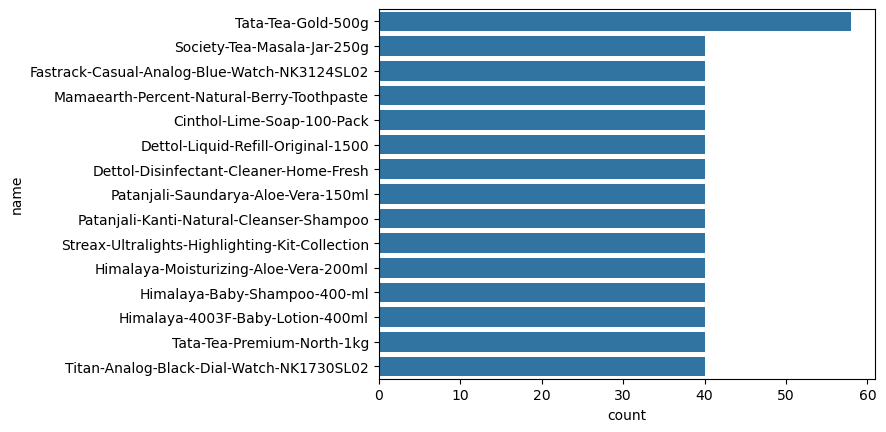

In [58]:
# Exploring keyword column

sns.barplot(y = data['name'].value_counts()[:15].index,
            x= data['name'].value_counts()[:15], orient = 'h')

In [59]:
train_data.loc[train_data['review'].str.contains('5',na=False, case=False)].rating.value_counts()

rating
5    111
1     59
4     33
3     26
2     12
Name: count, dtype: int64

In [60]:
# A glance over the existing data

train_data['review'][:5]

80      I bought this because I was super impressed wi...
2174    The tea is light in flavour but tastes good......
734      Product is not seal pack. It was already opened.
563           Just Awssm..Value For Money..Really Happy..
2389    Excellent quality and looking cool when I wear...
Name: review, dtype: object

### Text Data PreProcessing

In [62]:
# Applying Text cleaning techinques
# Make text lowercase, remove text in square brackets,remove links,remove punctuation
# and remove words containing numbers.
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|WWW\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\W*\d\W*','',text)
    return text


In [63]:
# Applying cleaning function to both train and test datasets
train_data['review'] = train_data['review'].apply(lambda x: clean_text(x))
test_data['review'] = test_data['review'].apply(lambda x: clean_text(x))


In [64]:
#lets take a look at the updated text
train_data['review'].head()

80      i bought this because i was super impressed wi...
2174    the tea is light in flavour but tastes good pe...
734        product is not seal pack it was already opened
563                 just awssmvalue for moneyreally happy
2389    excellent quality and looking cool when i wear...
Name: review, dtype: object

### Repeated words in WordCloud Format

Text(0.5, 1.0, 'Repeated words of Reviews')

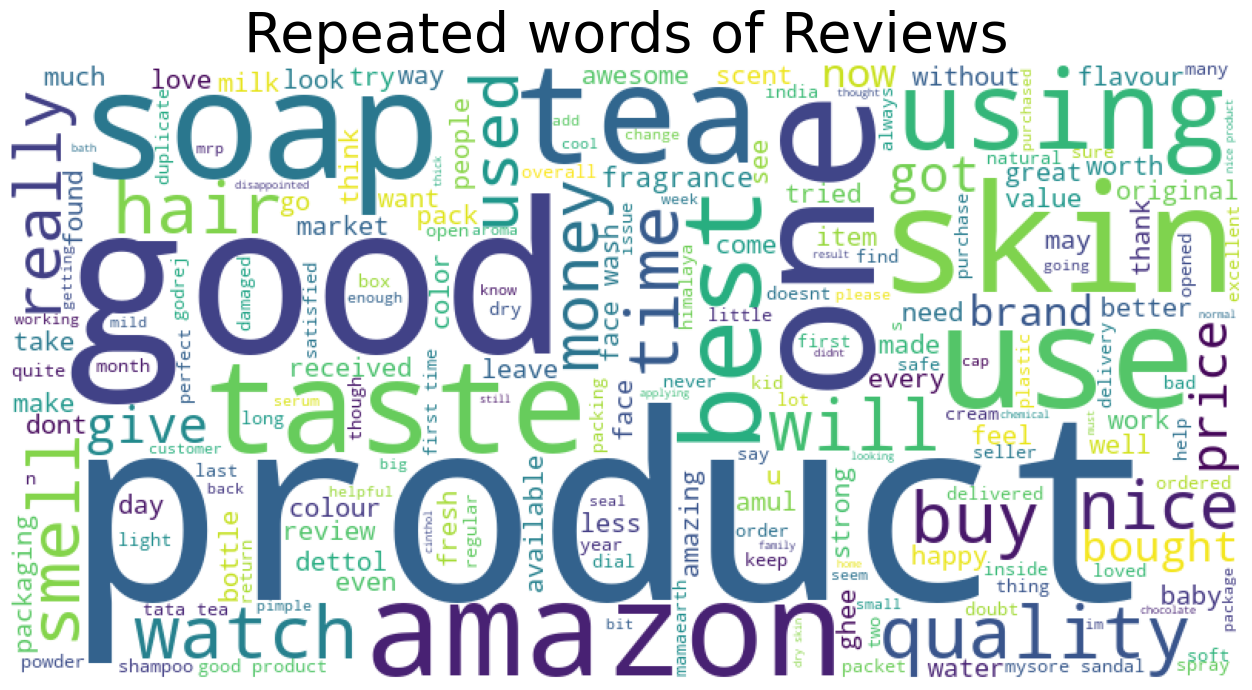

In [66]:
from wordcloud import WordCloud
fig, ax1 = plt.subplots(1, figsize=[20, 8])

#ax1==>disaster_tweets
wordcloud1 = WordCloud( background_color='white',
                        width=800,
                        height=400).generate(" ".join(train_data['review']))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Repeated words of Reviews',fontsize=40)

### TOKENIZATION

In [68]:
from collections import Counter
word_counter = Counter(train_data['review'])

In [69]:
most_common_words = word_counter.most_common()[:10]
most_common_words

[('good', 37),
 ('nice', 14),
 ('ok', 8),
 ('good product', 7),
 ('nice product', 5),
 ('tasty', 5),
 ('very good', 5),
 ('good gelit really prevents pimplesgood for all types of skincan use as night cream as well as primer',
  4),
 ('please do not buy this product this is an old product manufactured inwhen himalaya was using paraben based ingredients which are harmful for the babys skin you can search the internet for harmful effects of paraben now himalaya has removed paraben from the newly manufactured baby lotion buy the most recent stock the product will have free from paraben highlighted on the bottle save your babys skin by not ordering this product',
  4),
 ('damnmy badi ordered this product without reading all the reviewsme too got damaged watery bad lotionnow im not sure whether to use it or throw it awaybad lotion smells bad looks messy and leaked all over the packagetrying to return it but it says this item is not eligible for returnseriously amazon sucks these daystoo bad 

Text(0.5, 0, 'word rank')

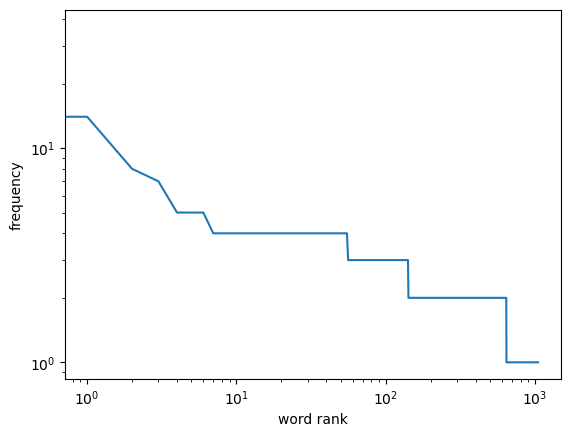

In [70]:
sorted_word_counts = sorted(list(word_counter.values()),reverse = True)
plt.loglog(sorted_word_counts)
plt.ylabel("frequency")
plt.xlabel("word rank")

In [71]:
# Example statement
text = "I got a parcel, but that's not mine!."
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print("Example Text:", text)
print("------------------------------------------------------------------------")
print("Tokenization by whitespace: ",tokenizer1.tokenize(text))
print()
print("Tokenization by words using Treebank word Tokenizer: ",tokenizer2.tokenize(text))
print()
print("Tokenization by Punctuation: ",tokenizer3.tokenize(text))
print()
print("Tokenization by regular expression: ",tokenizer4.tokenize(text))

Example Text: I got a parcel, but that's not mine!.
------------------------------------------------------------------------
Tokenization by whitespace:  ['I', 'got', 'a', 'parcel,', 'but', "that's", 'not', 'mine!.']

Tokenization by words using Treebank word Tokenizer:  ['I', 'got', 'a', 'parcel', ',', 'but', 'that', "'s", 'not', 'mine', '!', '.']

Tokenization by Punctuation:  ['I', 'got', 'a', 'parcel', ',', 'but', 'that', "'", 's', 'not', 'mine', '!.']

Tokenization by regular expression:  ['I', 'got', 'a', 'parcel', 'but', 'that', 's', 'not', 'mine']


### BAG OF WORDS

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(
    min_df=1, 
    max_df=0.7, 
    stop_words=stopwords.words('english')  # Use nltk's stopwords
)

# Fit and transform the text data into a document-term matrix
transformed = vectorizer.fit_transform(train_data).toarray()
test_vectors = vectorizer.transform(test_data).toarray()
# Print the transformed array
print(transformed)


[[0 1]
 [1 0]]


In [74]:
#Tokenizing the training and the test set
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_data['review'] = train_data['review'].apply(lambda x:tokenizer.tokenize(x))
test_data['review'] = test_data['review'].apply(lambda x:tokenizer.tokenize(x))


In [75]:
train_data['review'].head()

80      [i, bought, this, because, i, was, super, impr...
2174    [the, tea, is, light, in, flavour, but, tastes...
734     [product, is, not, seal, pack, it, was, alread...
563           [just, awssmvalue, for, moneyreally, happy]
2389    [excellent, quality, and, looking, cool, when,...
Name: review, dtype: object

### Stop Words Removal

In [77]:
def remove_stopwords(text):
    #remove stopwords belonging to english language
    words = [w for w in text if w not in stopwords.words('english')] 
    return words

train_data['review'] = train_data['review'].apply(lambda x: remove_stopwords(x))
test_data['review'] = test_data['review'].apply(lambda x: remove_stopwords(x))
    

### STEMMING AND LEMMATIZATION 

In [79]:
#Eample text
text = "The parcel arrived, but it is completely damaged."

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

#stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the Sentence: "," ".join(stemmer.stem(token) for token in tokens))

#lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
print("Lemmatizing the Sentence: "," ".join(lemmatizer.lemmatize(token) for token in tokens))

Stemming the Sentence:  the parcel arriv , but it is complet damag .
Lemmatizing the Sentence:  The parcel arrived , but it is completely damaged .


In [80]:
#after preprocessing , the text format

def combine_text(text):
    #takes a list of text and combines them into large chunk of text
    combined_text = ' '.join(text)
    return combined_text

train_data['review'] = train_data['review'].apply(lambda x: combine_text(x))
test_data['review'] = test_data['review'].apply(lambda x: combine_text(x))

In [81]:
train_data['review']

80      bought super impressed ingredients list one sa...
2174    tea light flavour tastes good people prefer st...
734                      product seal pack already opened
563                          awssmvalue moneyreally happy
2389    excellent quality looking cool wear white dial...
                              ...                        
2609    amazing fragranceoriginal product delicately p...
2165    im new mom trust every second important societ...
1907    curly hair recovering heat damage hence went n...
2217    quality item mark flavor strong test family fo...
2391    ive recived lovely watch like much comfort wat...
Name: review, Length: 1943, dtype: object

### ALL PREPROCESSING PART TOGETHER

In [83]:
#text precessing function
def text_processing(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    no_punc = clean_text(text)
    tokenized_text = tokenizer.tokenize(no_punc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

In [85]:
train_data

,review,rating
80,bought super impressed ingredients list one sa...,5
2174,tea light flavour tastes good people prefer st...,5
734,product seal pack already opened,1
563,awssmvalue moneyreally happy,5
2389,excellent quality looking cool wear white dial...,5
...,...,...
2609,amazing fragranceoriginal product delicately p...,5
2165,im new mom trust every second important societ...,3
1907,curly hair recovering heat damage hence went n...,5
2217,quality item mark flavor strong test family fo...,1


### To predict sentiment analysis using the SentimentIntensityAnalyzer model."

In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [88]:
train_data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in train_data['review']]
train_data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in train_data['review']]
train_data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in train_data['review']]
train_data['Compund'] = [sentiments.polarity_scores(i)['compound'] for i in train_data['review']]


In [89]:
train_data

,review,rating,Positive,Negative,Neutral,Compund
80,bought super impressed ingredients list one sa...,5,0.401,0.062,0.537,0.9523
2174,tea light flavour tastes good people prefer st...,5,0.521,0.000,0.479,0.8271
734,product seal pack already opened,1,0.000,0.000,1.000,0.0000
563,awssmvalue moneyreally happy,5,0.649,0.000,0.351,0.5719
2389,excellent quality looking cool wear white dial...,5,0.564,0.000,0.436,0.9382
...,...,...,...,...,...,...
2609,amazing fragranceoriginal product delicately p...,5,0.614,0.000,0.386,0.9524
2165,im new mom trust every second important societ...,3,0.181,0.000,0.819,0.6249
1907,curly hair recovering heat damage hence went n...,5,0.324,0.061,0.614,0.8934
2217,quality item mark flavor strong test family fo...,1,0.074,0.164,0.762,-0.4576


The final_score(reviews) function should process the input by first passing it through the clean_text function, calculate the polarity scores using the SentimentIntensityAnalyzer, and then return the final sentiment analysis result based on the user's entered review in the text box.

In [91]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


# Initialize SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Define final_score function
def final_score(reviews):
    cleaned_text = clean_text(reviews)
    scores = sentiment.polarity_scores(cleaned_text)
    
    # Compute sentiment percentages
    total = scores['pos'] + scores['neg'] + scores['neu']
    if total == 0:
        return "Neutral (0.00%)"  # Handle division by zero
    
    pos_percent = (scores['pos'] / total) * 100
    neg_percent = (scores['neg'] / total) * 100
    neu_percent = (scores['neu'] / total) * 100

    # Determine the sentiment label
    if (scores['pos'] > scores['neg']) and (scores['pos'] > scores['neu']):
        return f"Positive {pos_percent:.2f}%"
    elif (scores['neg'] > scores['pos']) and (scores['neg'] > scores['neu']):
        return f"Negative {neg_percent:.2f}%"
    else:
        return f"Neutral {neu_percent:.2f}%"


reviews = clean_text(input("Enter your reviews here: "))
print("THE REVIEWS IS:",reviews,'\n Final Score',final_score(reviews))




Enter your reviews here:  good product


THE REVIEWS IS: good product 
 Final Score Positive 74.40%


In [92]:
# Apply final_score to calculate sentiment scores

train_data['Sentiment Score'] = train_data['review'].apply(final_score)


In [93]:
train_data.head()

,review,rating,Positive,Negative,Neutral,Compund,Sentiment Score
80,bought super impressed ingredients list one sa...,5,0.401,0.062,0.537,0.9523,Neutral 54.00%
2174,tea light flavour tastes good people prefer st...,5,0.521,0.000,0.479,0.8271,Positive 52.10%
734,product seal pack already opened,1,0.000,0.000,1.000,0.0000,Neutral 100.00%
563,awssmvalue moneyreally happy,5,0.649,0.000,0.351,0.5719,Positive 64.90%
2389,excellent quality looking cool wear white dial...,5,0.564,0.000,0.436,0.9382,Positive 56.40%


In [94]:
test_data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in test_data['review']]
test_data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in test_data['review']]
test_data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in test_data['review']]

In [95]:
test_data.head()

,review,rating,Positive,Negative,Neutral
2679,like,5,1.000,0.000,0.000
442,awesome watch love product price,5,0.735,0.000,0.265
349,recieved defective product option replacement ...,1,0.188,0.353,0.459
139,guys cant believe really work face like magic ...,5,0.316,0.000,0.684
635,best aamras juice pack compelled try items pap...,5,0.474,0.000,0.526


In [96]:
test_data['Sentiment Score'] = test_data['review'].apply(final_score)


In [97]:
test_data.head()

,review,rating,Positive,Negative,Neutral,Sentiment Score
2679,like,5,1.000,0.000,0.000,Positive 100.00%
442,awesome watch love product price,5,0.735,0.000,0.265,Positive 73.50%
349,recieved defective product option replacement ...,1,0.188,0.353,0.459,Neutral 45.90%
139,guys cant believe really work face like magic ...,5,0.316,0.000,0.684,Neutral 65.40%
635,best aamras juice pack compelled try items pap...,5,0.474,0.000,0.526,Neutral 52.60%
